In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from utils import * 
%matplotlib inline
plt.style.use('default')
sns.set_theme(style="whitegrid")

In [16]:
def analyze_session(db_name="ble_scanner", collection_name="session1", days=1):
    """
    Analyze a specific scanning session
    
    Args:
        db_name (str): MongoDB database name
        collection_name (str): Collection name
        days (int): Number of days to analyze
    """
    # Connect to MongoDB
    collection = connect_mongodb(
        uri="mongodb://10.147.19.42:27017",  # Replace with your MongoDB URI
        db_name=db_name,
        collection_name=collection_name
    )
    
    # Set time period
    end_date = datetime.now()
    start_date = end_date - timedelta(days=days)
    
    print(f"\nAnalyzing period:")
    print(f"Start: {start_date.strftime('%Y-%m-%d %H:%M:%S')}")
    print(f"End: {end_date.strftime('%Y-%m-%d %H:%M:%S')}")
    
    # Query data
    data = query_data_by_date(collection, start_date, end_date)
    if not data:
        print("No data found for the specified period")
        return
    
    # Process data
    df = process_buffer_data(data)
    
    # Analyze buffer statistics
    stats, fig = analyze_buffer_stats(data, df)
    
    # Print statistics
    print("\nBuffer Statistics:")
    print("-----------------")
    print(f"Total Buffers: {stats['total_buffers']}")
    print(f"Total Unique Devices: {stats['total_devices']}")
    print(f"Average Devices per Buffer: {stats['avg_devices_per_buffer']:.2f}")
    print(f"Time Span: {stats['time_span_hours']:.2f} hours")
    print(f"Average RSSI: {stats['avg_rssi']:.1f} dBm")
    
    if 'sequence_gaps' in stats and stats['sequence_gaps']:
        print("\nSequence Gaps:")
        print("--------------")
        print(f"Total gaps found: {stats['total_gaps']}")
        print(f"Total missed sequences: {stats['total_missed_sequences']}")
        print("\nGap details:")
        for start_seq, end_seq, gap_size in stats['sequence_gaps']:
            print(f"Gap between sequence {start_seq} and {end_seq} (missed {gap_size} sequences)")
    
    # Show the plot
    plt.show()
    
    return data, df, stats, fig


Analyzing period:
Start: 2025-01-27 12:26:06
End: 2025-02-04 12:26:06

Buffer Statistics:
-----------------
Total Buffers: 70927
Total Unique Devices: 2549
Average Devices per Buffer: 380.59
Time Span: 169.82 hours
Average RSSI: -74.9 dBm


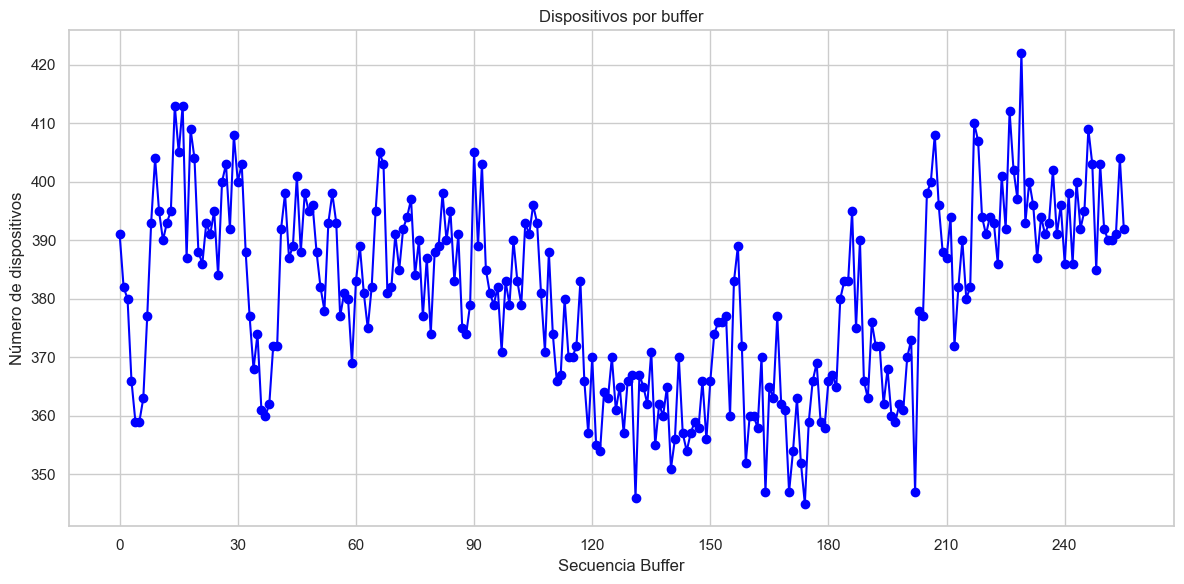

In [17]:
data, df, stats, fig = analyze_session(
        collection_name="session1",  # Replace with your collection name
        days=8  # Analyze last 24 hours
    )